In [1]:
import pandas as pd

df = pd.read_csv('./data/form.csv')

In [2]:
df.columns = ['timestamp', 'sex', 'age', 'city','employee_sum', 'yearly', 'yearly_bonus', 'stock_options', 'position', 'experience', 'education', 'insurance']

In [3]:
def ganti_education(s): 
    if 's1' in s.lower() or 's.' in s.lower() or 'sarjana' in s.lower() or 'bachelor' in s.lower() or 'b.' in s.lower() or 'ilmu komputer' in s.lower(): 
        return 'S1'
    elif 's2' in s.lower() or 'master' in s.lower(): 
        return 's2'
    elif 'smk' in s.lower() or 'sma' in s.lower() or 'senior year' in s.lower() or 'man' in s.lower() or 'college courses' in s.lower() or 'smu' in s.lower(): 
        return 'SMA'
    elif 'diploma' in s.lower() or 'd4' in s.lower() or 'd3' in s.lower() or 'd2' in s.lower() or 'd1' in s.lower(): 
        return 'diploma'
    elif 'self taught' == s.lower(): 
        return 'self taught'
    else: 
        return 'KELAINAN'

def ngisi_experience_masa_pake_tahun(s):
    if isinstance(s, float): 
        return s
    
    if s: 
        for a in s.split(): 
            if a.isdigit(): 
                return int(a)
    else: 
        return 0

def jakarta_mah_jakarta_aja(s): 
    if 'jakarta' in s.lower(): 
        return 'jakarta'

def insurance_to_categorical(s): 
    if s: 
        return 'yes'
    else:
        return 'no'

In [4]:
df

,timestamp,sex,age,city,employee_sum,yearly,yearly_bonus,stock_options,position,experience,education,insurance
0,15/02/2020 12:22:25,Laki-Laki,27,Jakarta,1.0,216.000.000,258.000.000,0,"Software Engineer, Front End",5,S1,NaN
1,15/02/2020 12:31:02,Laki-Laki,25,Jakarta,20.0,192.000.000,32.000.000,0,Frontend Engineer,4,S1,Rawat inap
2,15/02/2020 12:33:01,Laki-Laki,30,Depok,20.0,100.000.000,0,0,programer,10,s1,NaN
3,15/02/2020 12:33:07,Laki-Laki,23,Bandung,3.0,95.000.000,25.000.000,0,SDE,2,S1,"BPJS, reimburse"
4,15/02/2020 12:33:28,Laki-Laki,23,Jakarta,3.0,96.000.000,0,0,Staff Android Developer,3,S1,BPJS
...,...,...,...,...,...,...,...,...,...,...,...,...
395,21/02/2020 12:16:50,Laki-Laki,22,Jakarta,7.0,6000000,NaN,0,IT Programmer,4,SMK,BPJS TK dan Kes
396,22/02/2020 9:55:15,Laki-Laki,24,Jakarta Selatan,2.0,80400000,NaN,112300000,Executive,3,Diploma IV - S. Tr. Kom.,7000000
397,23/02/2020 9:30:49,Laki-Laki,23,Bandung,300.0,150000000,230000000,0,Software Developer Engineer,1,S1 Teknologi Informasi,"BPJS, Rawat Inap, Rawat Jalan, Kacamata, Famil..."
398,25/02/2020 19:06:13,Laki-Laki,23,Jakarta Selatan,3000.0,330000000,NaN,NaN,Sr. Software Engineer,3,"S1 Informatika, S.Kom",NaN


In [5]:
df['education'] = df['education'].apply(ganti_education)
df['experience'] = df['experience'].apply(ngisi_experience_masa_pake_tahun)

df['yearly'] = df['yearly'].str.replace('.','')
df['yearly_bonus'] = df['yearly_bonus'].str.replace('.','')

df['yearly'] = pd.to_numeric(df['yearly'])
df['yearly_bonus'] = pd.to_numeric(df['yearly_bonus'])

df['city'] = df['city'].apply(jakarta_mah_jakarta_aja)
df['insurance'] = df['insurance'].apply(insurance_to_categorical)

In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df,title='(katanya sih) Gaji Karyawan IT')

In [7]:
profile

# Plotting fun (jk, it's not)

In [8]:
import seaborn as sns
import matplotlib.pyplot  as plt

In [9]:
df.groupby('age').agg(['sum', 'mean'])

employee_sum                   yearly                yearly_bonus  \
             sum        mean          sum          mean           sum   
age                                                                     
19         124.0   20.666667    354200000  5.903333e+07  2.348000e+08   
20         697.0  116.166667   1072500000  1.787500e+08  2.567000e+08   
21        1486.0  123.833333   1660000000  1.383333e+08  4.803018e+08   
22        2276.0   56.900000   3706700000  9.266750e+07  1.054700e+09   
23        4842.1  124.156410   4921705336  1.261976e+08  1.729025e+09   
24        8859.5  192.597826   7251680000  1.576452e+08  2.901520e+09   
25       10272.5  256.812500   5911304000  1.477826e+08  2.634108e+09   
26        4483.0  140.093750   9391120000  2.934725e+08  3.010150e+09   
27       20310.0  495.365854  10036800000  2.448000e+08  3.452660e+09   
28        2892.5   99.741379   7731900000  2.666172e+08  2.125700e+09   
29        4568.0  240.421053   8906000000  4.687368e+08  2.600600e+09   
30       12858.0  584.454545   4993900000  2.269955e+08  2.749111e+09   
31         454.0   56.750000   1864800000  2.331000e+08  8.624000e+08   
32        1822.0  202.444444   4537725048  5.041917e+08  9.424550e+08   
33        2453.0  204.416667   3745000000  3.120833e+08  7.760001e+08   
34        1175.0  106.818182   2727000000  2.479091e+08  5.425000e+08   
35         740.0   92.500000   4317200000  5.396500e+08  1.378000e+09   
36         878.0  109.750000   4779000000  5.973750e+08  2.735000e+09   
37          64.0   21.333333   1750000000  5.833333e+08  4.000000e+07   
39         100.0  100.000000    360000000  3.600000e+08  3.500000e+08   
40        1951.0  487.750000   2859000000  7.147500e+08  5.124000e+09   
42         350.0  175.000000    903600000  4.518000e+08  2.278000e+08   
44          10.0   10.000000    600000000  6.000000e+08  1.000000e+08   
50         100.0  100.000000    500000000  5.000000e+08  1.500000e+08   

                  experience             
             mean        sum       mean  
age                                      
19   3.913333e+07       11.0   1.833333  
20   4.278333e+07        5.0   1.000000  
21   4.002515e+07       22.0   1.833333  
22   2.704359e+07       43.0   1.102564  
23   4.550067e+07       68.0   1.743590  
24   6.447822e+07       82.0   1.822222  
25   6.585270e+07      122.0   3.050000  
26   9.406719e+07      109.0   3.406250  
27   8.421122e+07      166.0   4.048780  
28   7.591786e+07      146.0   5.034483  
29   1.368737e+08      114.0   6.000000  
30   1.249596e+08      153.0   6.954545  
31   1.078000e+08       55.0   6.875000  
32   1.047172e+08       76.0   8.444444  
33   7.054546e+07      110.0   9.166667  
34   4.931818e+07      118.0  10.727273  
35   1.722500e+08       94.0  11.750000  
36   3.418750e+08      102.0  12.750000  
37   1.333333e+07       37.0  12.333333  
39   3.500000e+08       12.0  12.000000  
40   1.281000e+09       42.0  10.500000  
42   1.139000e+08       34.0  17.000000  
44   1.000000e+08       19.0  19.000000  
50   1.500000e+08       15.0  15.000000

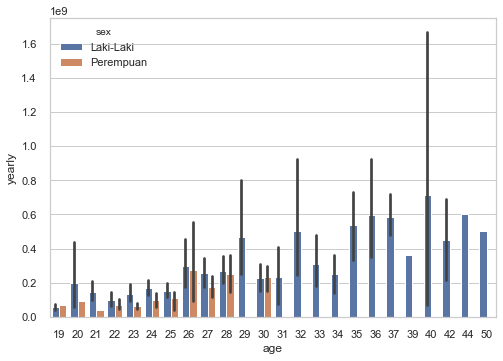

In [10]:
sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.barplot(x="age", y="yearly", hue='sex', data=df)

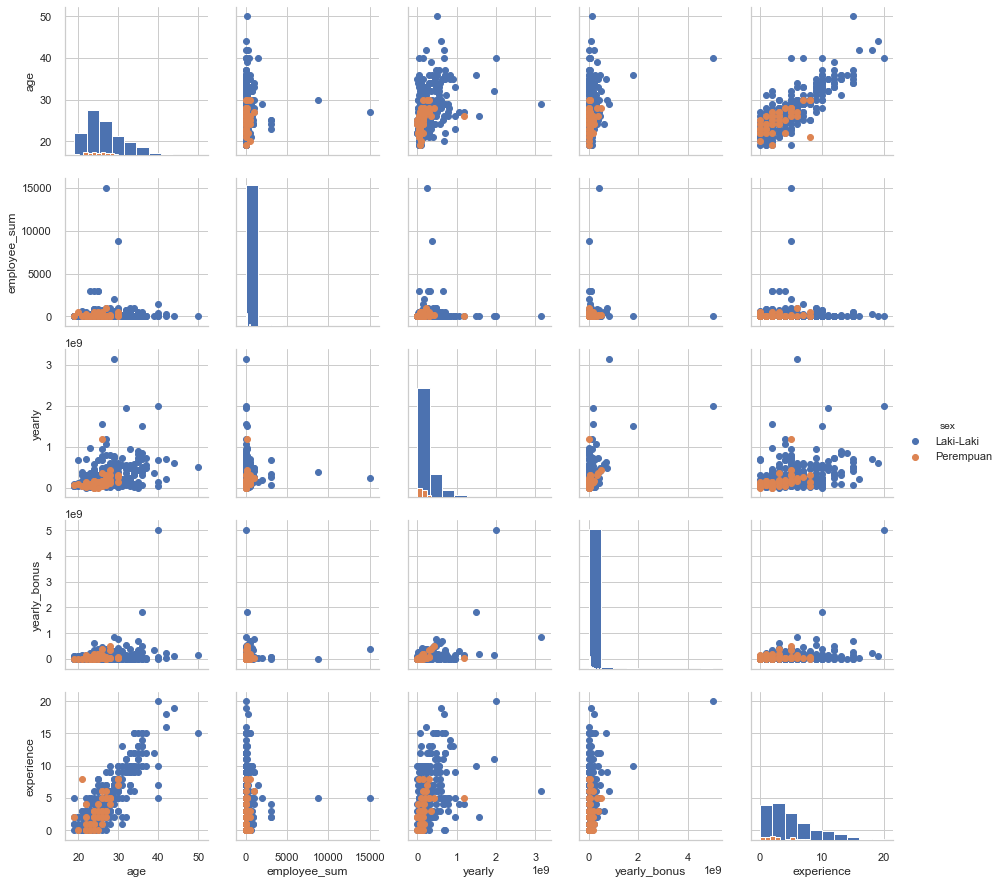

In [11]:
g = sns.PairGrid(df, hue='sex')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();